<a href="https://colab.research.google.com/github/DoubleCyclone/Neural-Network-From-Scratch/blob/main/notebooks/Neural_Network_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Introduction & Setup
As a Machine Learning student (self-proclaimed), I am learning how to build and use various models. In this notebook specifically, I will create my own Neural Network from Scratch with **Numpy**. After that, I will create an identical model with **PyTorch** and compare them.

I will be using the [**MNIST**](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) dataset to train the model and run predictions.

Let's import the packages first.

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

At first I have to load the **MNIST** datasets (Train / Test). While doing that, let's print out their shapes to learn a little more about them.


In [ ]:
# Load the MNIST dataset with the specified transformation
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Convert datasets to Numpy arrays
X_train_full = mnist_train.data.numpy()  #(60000, 28, 28)
y_train_full = mnist_train.targets.numpy()  # (60000,)
X_test = mnist_test.data.numpy()  # (10000, 28, 28)
y_test = mnist_test.targets.numpy()  # (10000,)

print(f"Full training data: {X_train_full.shape}")
print(f"Full training labels: {y_train_full.shape}")
print(f"Test data: {X_test.shape}")
print(f"Test labels: {y_test.shape}")

Full training data: (60000, 28, 28)
Full training labels: (60000,)
Test data: (10000, 28, 28)
Test labels: (10000,)


There are 60000 images in the training set and 10000 in the test set and the images are of 28x28 size. Now let's plot a few of them with their labels as visualization is of utmost importance especially when learning.

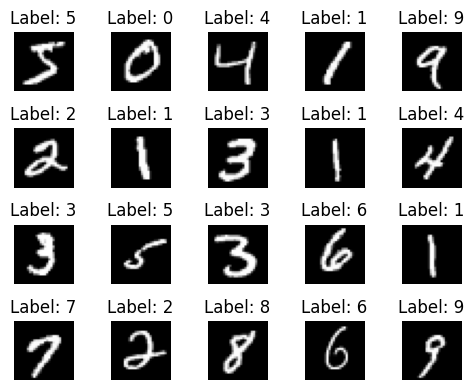

In [ ]:
# Create a figure to display the images
fig, axs = plt.subplots(4, 5 , figsize=(5, 4))

# Flatten to iterate easily
axs = axs.flatten()

# For every sample in the training set
for i, data in enumerate(X_train_full):
    # Plot it (until the 20th)
    if i < 20:
        axs[i].imshow(X_train_full[i].squeeze(), cmap='gray') # Show the image
        axs[i].set_title(f"Label: {y_train_full[i]}") # Set the label as the title
        axs[i].axis('off') # Turn off axis to make the image cleaner
    else:
        break  # Exit the loop after printing 20 samples

# Fix overlap and show the plot
fig.tight_layout()
fig.show()

What about checking how one example looks in numerical form? (Click on the show data button in the output)

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Seems like the background (black) is encoded as 0 and the foreground as greater than 0 (white/whiteish) where it gets closer to white the further away the value gets from 0.

For our handmade Neural Network, I will set up just one hidden layer. Output node count has to be equal to the class count which is 10 (numbers from 0 to 9). Input node count has to be equal to the image size which is 28 x 28 = 784 pixels.

# 2 - Building Mathematical Components
As activation functions, I will be using **ReLU** (Rectified Linear Unit) for hidden layers as it helps with vanishing gradient problem and **Softmax** for the output layer so that their probabilities' sum will be equal to 1 (100%). Let's start by implementing **ReLU** and plotting it.

In [ ]:
# Relu function
def relu(x : float) :
  return np.maximum(0, x)

Let's also create a simple plotting function to easily visualize our implemented functions.

In [ ]:
def plot_func(func, x) :
  # plot x versus y (func(x))
  plt.plot(x, [func(val) for val in x])
  plt.xlabel("x")
  plt.ylabel("Function")
  plt.show()

Now let's visualize to check if the function is correct.

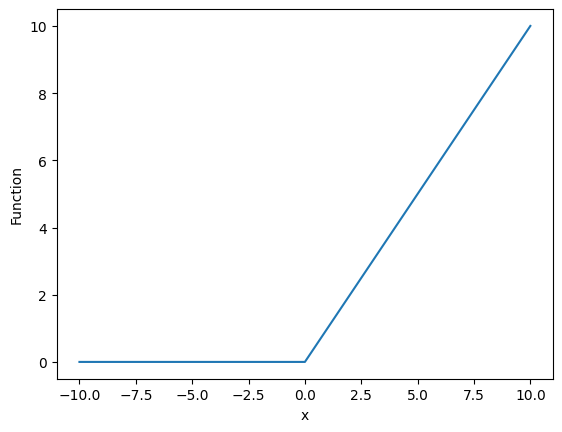

In [ ]:
# decide on some x values for plotting
x = [i for i in range(-10, 11, 1)]

plot_func(relu, x)

I will have to implement the derivatives of these functions as they will be needed later on.

In [ ]:
def d_relu(x) :
  return x > 0

Visualize this one as well.

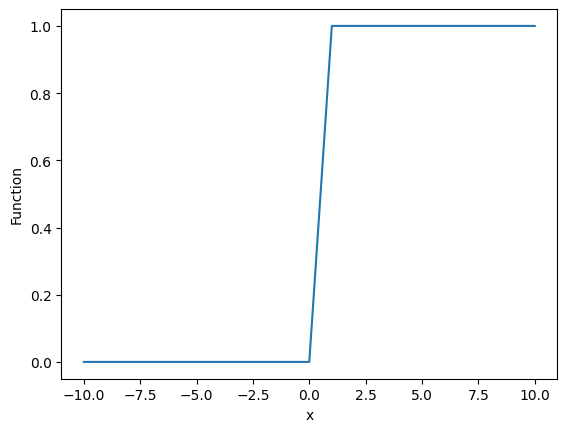

In [ ]:
plot_func(d_relu, x)

Now I will implement the **Softmax** function.

In [ ]:
def softmax(logits) :
  exp_logits = np.exp(logits - np.max(logits, axis=-1, keepdims=True))
  return exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)

In [ ]:
# Create a simple vector for testing
vector = [1, 3, 2]

# Test the function
print(softmax(vector))

[0.09003057 0.66524096 0.24472847]


Seems like the softmax function is working as intended as well. For a model to evaluate how much error it has, we need a **Loss Function**. As this is a multiclass classification task, I can use something called a **Categorical Cross-entropy loss**. It measures the difference between the predicted probability distribution and the true one-hot encoded labels, penalizing the model when confidence is low on the correct class. Now let's implement it.

In [ ]:
def categorical_cross_entropy(pred_labels, true_labels):
    # A very small number to avoid division by zero
    epsilon = 1e-9
    # Clip values into a range of
    pred_labels = np.clip(pred_labels, epsilon, 1 - epsilon)
    # This is just the formula...
    return -np.sum(true_labels * np.log(pred_labels))

Now let's test the function with dummy values. Note that our loss function requires one-hot encoded labels so the dummy will be written accordingly.

In [ ]:
true_label = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0] )# Example one-hot encoding for class 4, length 10 for MNIST
preds = softmax(np.random.rand(10)) # Generate 10 random logits for 10 classes

# Has to be 1 (floating point precision problem may make this 0.99999999 or 1.00000002 or similar which is okay)
print(np.sum(preds))

print(categorical_cross_entropy(preds, true_label))

0.9999999999999999
2.487553821955515


Now for the derivative of the cross-entropy. As the loss function will take predictions that come from **Softmax**, their combined derivative conveniently have a really simple formula.

In [ ]:
def d_categorical_cross_entropy(pred_labels, true_labels) :
  return pred_labels - true_labels

Let's test with dummy data.

In [ ]:
print(d_categorical_cross_entropy(np.asarray([0.15, 0.4, 0.46]), np.asarray([1, 0, 0])))

[-0.85  0.4   0.46]


Now that our functions are ready, I can start building some matrices so that they form a neural network. For weights, there are a few initialization strategies like **Xavier Initialization** and **He Initialization**. First one is more suitable for layers that use **TANH** or **Sigmoid** activation functions whereas the second one is better when paired with **ReLU** activation function.

To decide on the size of our only hidden layer, I will follow a few rule-of-thumb methods:
1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
3. The number of hidden neurons should be less than twice the size of the input layer.

So if I were to follow the second rule, the hidden layer should have 533 (532,6 rounded up) nodes. Now let's build the layers.

In [ ]:
# Calculate total nodes on each layer
input_node_count = X_train_full[0].shape[0] * X_train_full[0].shape[1] # first example's dimensions multiplied (28 x 28)
output_node_count = len(np.unique(y_train_full)) # unique class count in the dataset (10)
hidden_node_count = np.ceil((input_node_count * 2 / 3) + output_node_count).astype(int) # rule of thumb formula

# Initialize node weights with He Initialization strategy
input_hidden_weights = np.random.randn(input_node_count, hidden_node_count) * np.sqrt(2 / input_node_count)
hidden_output_weights = np.random.randn(hidden_node_count, output_node_count) * np.sqrt(2 / hidden_node_count)

# Initialize node biases to zero (often done this way)
hidden_biases = np.zeros(shape=(hidden_node_count))
output_biases = np.zeros(shape=(output_node_count))

print(f"Input-Hidden Layer weights amount : {input_hidden_weights.shape}")
print(f"Hidden-Output Layer weights amount : {hidden_output_weights.shape}")
print(f"Hidden biases Layer amount : {hidden_biases.shape}")
print(f"Output biases Layer amount : {output_biases.shape}")

Input-Hidden Layer weights amount : (784, 533)
Hidden-Output Layer weights amount : (533, 10)
Hidden biases Layer amount : (533,)
Output biases Layer amount : (10,)


# 3 - Forward Propagation
Now that our layers are ready, it is time to combine them so that they can perform a single forward pass. But before that, I will scale the data so that the range of brightness is reduced from 0-255 to 0-1 as it is infinitely more manageable to work with smaller numbers. I can do this by adding a **Normalization Layer** before any weights or biases are applied. After that, I will also One-Hot encode the labels to be able to compare them with the output probabilities easily. Let's prepare their methods.

In [ ]:
def apply_normalization(data):
    # If it's a single image (28x28), reshape to (1, 784)
    # If it's a batch (Batch, 28, 28), reshape to (Batch, 784)
    reshaped_data = data.reshape(data.shape[0] if data.ndim > 2 else 1, -1)
    # Scale the data by dividing the value by 255 (max value)
    return reshaped_data / 255

In [ ]:
def apply_one_hot_encoding(labels) :
  # Shape the new labels with rows equal to old labels but cols equal to output node count (old_labels, 10)
  oh_encoded = np.empty(shape=(len(labels), output_node_count))
  for i, row in enumerate(oh_encoded) :
    # set all cells to 0 and only the label cell to 1
    oh_encoded[i] = 0
    oh_encoded[i, labels[i]] = 1
  return oh_encoded

In [ ]:
def reverse_one_hot_encoding(labels) :
  # Find the index of the 1 in each one-hot encoded vector
  reversed_labels = np.argmax(labels, axis=1)
  return reversed_labels

After this normalization, I will multiply all the neurons in the input layer by the weights that were initialized earlier.

In [ ]:
def apply_weights(data, weights):
    return np.dot(data, weights)

Then the biases will be added to the outputs from the weight multiplication.

In [ ]:
def apply_biases(data, biases):
    return data + biases

After that, the activation function (ReLU) will be applied to the outputs so that the values are 0 or greater than 0. Lastly, Softmax will be applied so that the logits will be turned into meaningful predictions that sum up to 1. I already implemented ReLU and Softmax earlier so let's just add them all together for a single forward pass.

In [ ]:
def single_forward(data, weights_1, biases_1, weights_2, biases_2):
    # Normalize the data (scale)
    input_layer = apply_normalization(data)

    # Multiply by the weights and add the biases from input to hidden layer
    z1 = apply_biases(apply_weights(input_layer, weights_1), biases_1)
    # Apply the activation function
    a1 = relu(z1)

    # Multiply by the weights and add the biases from hidden to output layer
    z2 = apply_biases(apply_weights(a1, weights_2), biases_2)
    # Apply softmax to turn logits into predictions
    a2 = softmax(z2)

    # Create a dictionary to store the values (will be needed later)
    cache = {
        'input': input_layer,
        'z1': z1,
        'a1': a1,
        'z2': z2,
        'a2' : a2
    }

    return a2, cache

Let's test the forward pass on just one example and see if the outputs make sense.

In [ ]:
# Perform a single forward pass
preds, cache = single_forward(X_train_full[0], input_hidden_weights, hidden_biases, hidden_output_weights, output_biases)

# One-Hot Encode the first label for testing
true_label_one_hot = apply_one_hot_encoding([y_train_full[0]])

# Calculate the loss
loss = categorical_cross_entropy(preds, true_label_one_hot)

print(f"Predicted class : {np.argmax(preds)}")
print(f"Prediction values : {preds.flatten()}")
print(f"Sum of predictions : {preds.sum()}")
print(f"Loss : {loss}")

Predicted class : 7
Prediction values : [0.08432954 0.08692652 0.08507832 0.08325032 0.05693498 0.09479457
 0.12015052 0.19094356 0.11486224 0.08272943]
Sum of predictions : 0.9999999999999999
Loss : 2.3560431226872454


As can be seen from the sum and the values themselves, they sum up to 1 which was exactly what was needed. Note that currently as the model is not being trained at all (only random initialization), its predictions are random.
# 4 - Backward propagation
To be able to train the model, I need to implement something called "**Backward Propagation**" which is the process of calculating how much each weight and bias should change with respect to the current error of the prediction. For this, I need to implement the derivatives of the weights and biases on the layers with respect to the ones in the previous layers. Naturally, we start from the end which is why it is called **Backward propagation**. Fortunately the **Softmax** function and the **Cross-Entropy Loss** functions' derivatives cancel out most calculations, leaving only "predictions - true labels" for us to calculate for the first step.

In the next step, I need to calculate how much the weights between the hidden-output layers contribute to the losses so that we can increase/decrease their values accordingly. For this, we need the gradient from the latest step and the input to the layer. With these, we calculate the outer product of them so that we end up with same amount of gradients as the weight count.

Then we propagate error back to the hidden layer on which the ReLU derivative will be applied to check if the neurons were active or inactive.

From there, the same gradient after the ReLU derivative will be applied to the biases on the hidden layer as they are directly proportionate to the value after the activation.

Lastly, for the weights between the Input-Hidden layer, that same relu derivative applied gradient will be used to calculate the gradients along with the cached input values.

In [ ]:
def single_backward(cache, true_labels, weights_2):
    # Determine the number of samples in the current batch
    sample_count = true_labels.shape[0]

    # Gradient at output (predictions - true_labels)
    dL_dz2 = d_categorical_cross_entropy(cache['a2'], true_labels)

    # Gradients for second layer (averaged over batch)
    # Using .T (transpose) and np.dot performs the accumulation and averaging automatically
    dL_dbiases2 = np.sum(dL_dz2, axis=0) / sample_count
    dL_dweights2 = np.dot(cache['a1'].T, dL_dz2) / sample_count

    # Propagate error back to hidden layer
    dL_da1 = np.dot(dL_dz2, weights_2.T)

    # Apply ReLU derivative
    dL_dz1 = dL_da1 * d_relu(cache['z1'])

    # Gradients for first layer (averaged over batch)
    dL_dbiases1 = np.sum(dL_dz1, axis=0) / sample_count
    dL_dweights1 = np.dot(cache['input'].T, dL_dz1) / sample_count

    return {
        'dL_dweights1': dL_dweights1,
        'dL_dbiases1': dL_dbiases1,
        'dL_dweights2': dL_dweights2,
        'dL_dbiases2': dL_dbiases2
    }

In [ ]:
gradients = single_backward(cache, apply_one_hot_encoding([y_train_full[0]]), hidden_output_weights)

print(gradients['dL_dbiases1'])

[ 0.01485075  0.         -0.04215137  0.02020437  0.         -0.00136453
  0.02491405  0.          0.         -0.03740262  0.          0.
  0.          0.          0.00332367  0.          0.00181586  0.
 -0.00961174  0.          0.          0.08561954 -0.05806517 -0.01773005
  0.         -0.06060279  0.          0.          0.          0.
  0.14030386  0.          0.          0.06038001 -0.04901424  0.
 -0.00069577  0.          0.1750933  -0.04359185 -0.05290693  0.06850678
  0.          0.04381368  0.          0.         -0.02907515  0.
 -0.1014552  -0.01793876 -0.00505259  0.         -0.04671644 -0.03164797
  0.          0.          0.          0.10596725  0.05278147  0.
  0.          0.          0.          0.          0.          0.
  0.          0.03430042  0.          0.          0.          0.05186777
  0.          0.          0.         -0.01630428 -0.03045387  0.
 -0.1051232   0.00076924  0.          0.          0.          0.
  0.00331036  0.02238619  0.00353114  0.         -

# 5 - Training Loop
After calculating these gradients, I will update the weights/biases in the network so that the next forward pass will yield better results. As I already have implemented the forward pass and backward propagation, the next thing we need will be deciding on some **Hyperparameters** like **Learning Rate** so that we can amplify how much the gradients affect our model parameters with each pass.

Also, it is often better to run the gradient descent on mini-batches instead of after every sample. This is done by splitting the data into smaller chunks and running gradient descent after each chunk has been processed instead which is computationally cheaper.

I also will split the training set into training and validation sets to evaluate the model on data that weren't used to train the model which gives us an idea on how the model performs on generalization instead of memorization.

In [ ]:
# Split training data into train and validation sets (test is already set up)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.16666, random_state=42
)

print(f"\nAfter split:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


After split:
X_train: (50000, 28, 28), y_train: (50000,)
X_val: (10000, 28, 28), y_val: (10000,)
X_test: (10000, 28, 28), y_test: (10000,)


Now it is time to build the Model class.

In [ ]:
# TODO
class Model() :
  def __init__(self, input_node_count, hidden_node_count, output_node_count) :
    # Initialize node weights
    self.w1 = np.random.randn(input_node_count, hidden_node_count) * np.sqrt(2 / input_node_count)
    self.w2 = np.random.randn(hidden_node_count, output_node_count) * np.sqrt(2 / hidden_node_count)
    # Initialize node biases
    self.b1 = np.zeros(shape=(hidden_node_count))
    self.b2 = np.zeros(shape=(output_node_count))
    # To store losses
    self.epoch_losses = []
    self.val_losses = []

  # Call forward pass
  def __forward(self, data) :
    return single_forward(data, self.w1, self.b1, self.w2, self.b2)

  # Call backward propagation
  def __backward(self, cache, true_labels) :
    return single_backward(cache, true_labels, self.w2)

  # Update weights with respect to the gradients and learning rate
  def __update_weights(self, gradients, learning_rate) :
    self.w1 -= gradients['dL_dweights1'] * learning_rate
    self.b1 -= gradients['dL_dbiases1'] * learning_rate
    self.w2 -= gradients['dL_dweights2'] * learning_rate
    self.b2 -= gradients['dL_dbiases2'] * learning_rate

  def predict(self, X_test, compare = False, true_labels = None):
    # Pass the entire dataset X through the forward pass at once
    pred_probs, _ = self.__forward(X_test)

    # Use axis=1 to find the highest probability for each individual image
    preds = np.argmax(pred_probs, axis=1)

    # Initialize empty metrics dict
    metrics = {}

    # Calculate and store metrics if comparison is turned on
    if compare :
      # Determine if true_labels are already in 1D integer format or one-hot encoded
      if true_labels.ndim > 1: # If it's 2D (one-hot encoded), then reverse it
        true_labels_for_metrics = reverse_one_hot_encoding(true_labels)
      else: # If it's already 1D (integer labels), use it directly
        true_labels_for_metrics = true_labels

      # Calculate metrics
      metrics['accuracy'] = accuracy_score(true_labels_for_metrics, preds)
      metrics['precision'] = precision_score(true_labels_for_metrics, preds, average='weighted', zero_division=0)
      metrics['recall'] = recall_score(true_labels_for_metrics, preds, average='weighted', zero_division=0)
      metrics['f1'] = f1_score(true_labels_for_metrics, preds, average='weighted', zero_division=0)

    return preds, metrics

  def train(self, epochs, batch_size, learning_rate, X_train, y_train, val = False, X_val = None, y_val = None) :
    # For every epoch
    for epoch in range(epochs):
      # Shuffle the training set to prevent order bias
      X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)
      # Calculate number of batches
      num_batches = len(X_train_shuffled) // batch_size
      # Reset epoch loss
      epoch_loss = 0

      # For every batch
      for batch_idx in range(num_batches):
        # Calculate batch start and end indices
        batch_start = batch_idx * batch_size
        batch_end = batch_start + batch_size

        # Slice dataset accordingly
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Run forward pass (with softmax)
        predictions, cache = self.__forward(X_batch)

        # Divide by batch_size to get the average loss for this batch
        batch_loss = categorical_cross_entropy(predictions, y_batch) / batch_size
        epoch_loss += batch_loss

        # Perform back propagation
        gradients = self.__backward(cache, y_batch)
        # Update weights and biases
        self.__update_weights(gradients, learning_rate)

      # Record epoch loss
      self.epoch_losses.append(epoch_loss / num_batches)

      # Track validation loss
      val_loss = 0

      # Validation Loop
      if val:
        # Run forward pass on validation set
        val_predictions, _ = self.__forward(X_val)
        # Calculate total validation loss and divide by the number of validation samples
        self.val_losses.append(categorical_cross_entropy(val_predictions, y_val) / X_val.shape[0])

        # Print validation progress
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {self.epoch_losses[epoch]:.4f}, Val Loss: {self.val_losses[epoch]:.4f}")
      else :
        # Print training progress
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {self.epoch_losses[epoch]:.4f}")

# 6 - Training and Evaluation
Now that our model class is ready with its training function. It is time to train it and see how it performs.

In [ ]:
%%time
model_np = Model(input_node_count, hidden_node_count, output_node_count)

# Convert labels to one-hot for NumPy model
y_train_oh = apply_one_hot_encoding(y_train)
y_val_oh = apply_one_hot_encoding(y_val)
y_test_oh = apply_one_hot_encoding(y_test)

model_np.train(
    epochs=20,
    batch_size=64,
    learning_rate=0.05,
    X_train=X_train,
    y_train=y_train_oh,
    val=True,
    X_val=X_val,
    y_val=y_val_oh
)

Epoch 1/20, Train Loss: 0.4517, Val Loss: 0.2868
Epoch 2/20, Train Loss: 0.2560, Val Loss: 0.2220
Epoch 3/20, Train Loss: 0.2067, Val Loss: 0.1926
Epoch 4/20, Train Loss: 0.1738, Val Loss: 0.1668
Epoch 5/20, Train Loss: 0.1504, Val Loss: 0.1511
Epoch 6/20, Train Loss: 0.1325, Val Loss: 0.1376
Epoch 7/20, Train Loss: 0.1184, Val Loss: 0.1276
Epoch 8/20, Train Loss: 0.1063, Val Loss: 0.1191
Epoch 9/20, Train Loss: 0.0966, Val Loss: 0.1131
Epoch 10/20, Train Loss: 0.0888, Val Loss: 0.1069
Epoch 11/20, Train Loss: 0.0816, Val Loss: 0.1016
Epoch 12/20, Train Loss: 0.0752, Val Loss: 0.0986
Epoch 13/20, Train Loss: 0.0699, Val Loss: 0.0953
Epoch 14/20, Train Loss: 0.0649, Val Loss: 0.0933
Epoch 15/20, Train Loss: 0.0605, Val Loss: 0.0876
Epoch 16/20, Train Loss: 0.0564, Val Loss: 0.0860
Epoch 17/20, Train Loss: 0.0531, Val Loss: 0.0833
Epoch 18/20, Train Loss: 0.0500, Val Loss: 0.0835
Epoch 19/20, Train Loss: 0.0469, Val Loss: 0.0805
Epoch 20/20, Train Loss: 0.0440, Val Loss: 0.0794
CPU times

Our model's performance on the validaion set is expectedly worse than the one on the training set but it is definitely comparable which is great news. Now for a real evaluation I have to test it on the held-out test set which we haven't used before. For this I just have to call the predict function of the model class and visualize its predictions along with a few records from the test dataset loader.

It should be noted that the model has better validation loss at first than its train loss because the first validation loop is done after the first training loop where the model already has learnt significantly, boosting the performance on the validation.

In [ ]:
test_preds, metrics = model_np.predict(X_test, True, y_test)

for key, value in metrics.items() :
  print(f"{key} : {value:.4f}")

accuracy : 0.9769
precision : 0.9769
recall : 0.9769
f1 : 0.9769


Performance looks great even on the test data. Now let's visualize some predictions against the input images to reinforce the observations.

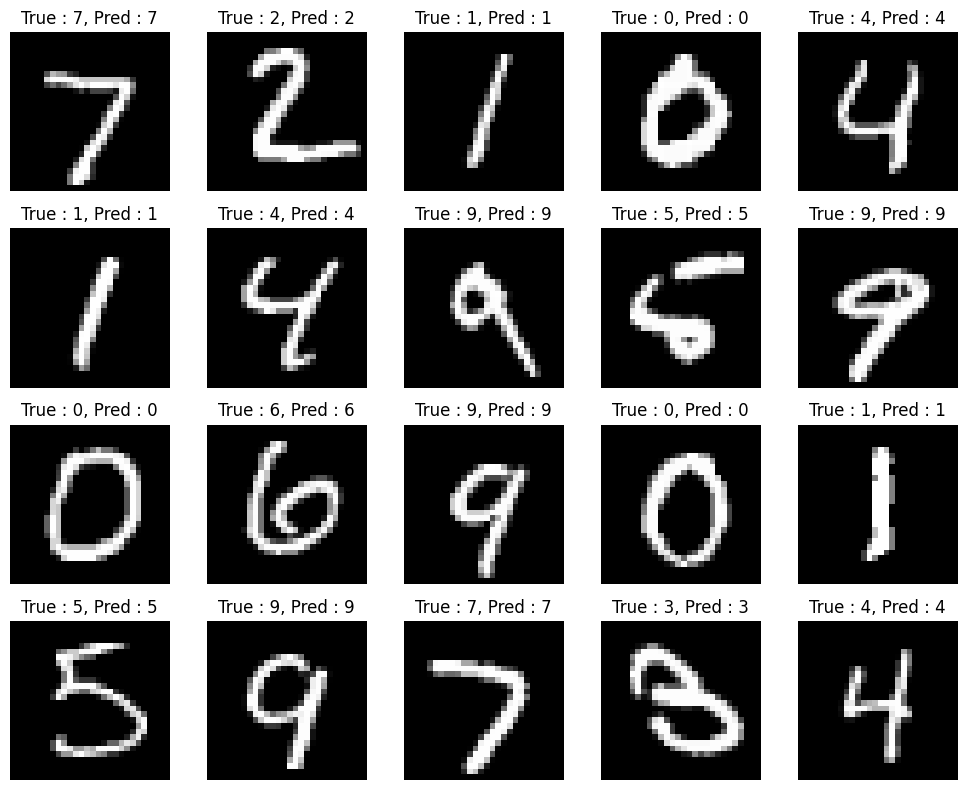

In [ ]:
# Create a figure to display the images
fig, axs = plt.subplots(4, 5 , figsize=(10, 8))

# Flatten to iterate easily
axs = axs.flatten()

# Print the first few images in a row
for i, rec in enumerate(X_test):
    # Print the first 20 samples
    if i < 20:
        axs[i].imshow(X_test[i].squeeze(), cmap='gray') # Show the image
        axs[i].set_title(f"True : {y_test[i]}, Pred : {test_preds[i]}") # Set the label and prediction as the title
        axs[i].axis('off') # Turn off axis to make the image cleaner
    else:
        break  # Exit the loop after printing 20 samples

# Fix overlap and show the plot
fig.tight_layout()
fig.show()

First 20 records' predictions look really good. Now let's find the failed predictions and visualize them instead.

Total incorrect predictions : 231
Count of incorrect predictions for class 0 : 9
Count of incorrect predictions for class 1 : 12
Count of incorrect predictions for class 2 : 20
Count of incorrect predictions for class 3 : 15
Count of incorrect predictions for class 4 : 26
Count of incorrect predictions for class 5 : 28
Count of incorrect predictions for class 6 : 23
Count of incorrect predictions for class 7 : 28
Count of incorrect predictions for class 8 : 36
Count of incorrect predictions for class 9 : 34


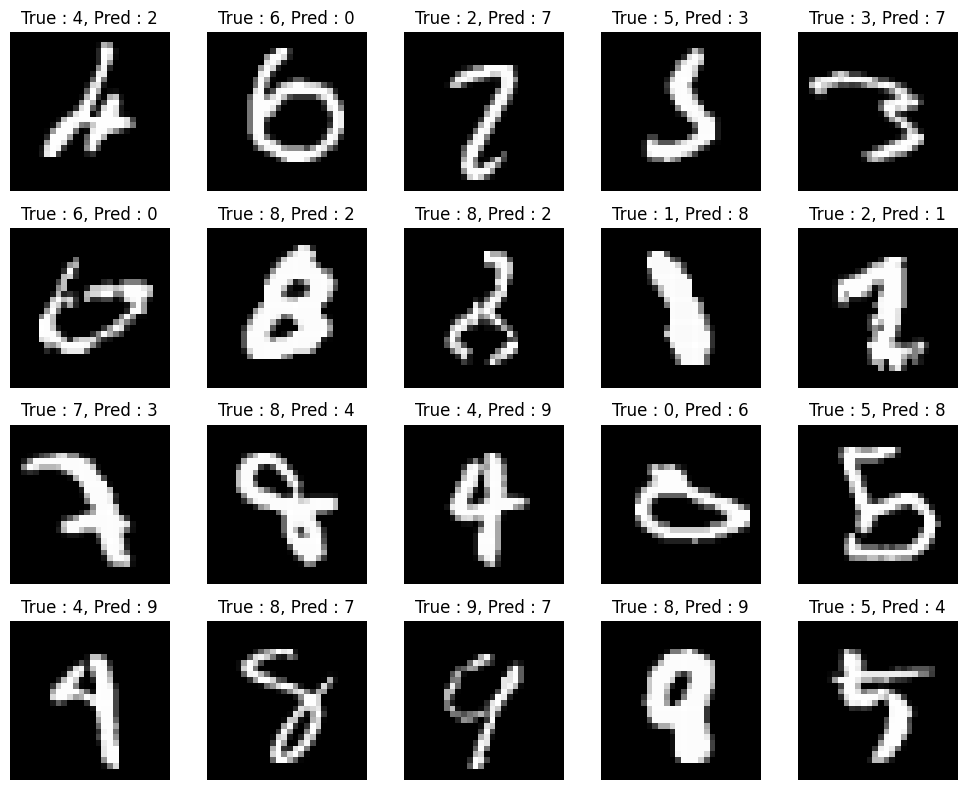

In [ ]:
# Get incorrect prediction count
print(f"Total incorrect predictions : {np.not_equal(y_test, test_preds).sum()}")

# Count incorrect predictions for each class
incorrect_counts_per_class = np.zeros(output_node_count, dtype=int)
for i in range(len(y_test)): # Iterate over y_test for true labels
    true_label = y_test[i]
    predicted_label = test_preds[i]
    if true_label != predicted_label:
        incorrect_counts_per_class[true_label] += 1

for i, count in enumerate(incorrect_counts_per_class):
    print(f"Count of incorrect predictions for class {i} : {count}")

# Create a figure to display the images
fig, axs = plt.subplots(4, 5 , figsize=(10, 8))

# Flatten to iterate easily
axs = axs.flatten()

# keep failed prediction count
failed_count = 0

# For every test example
for i, rec in enumerate(X_test):
  # Plot if true label and predicted label is different
  if y_test[i] != test_preds[i]: # Compare true label with predicted label
    axs[failed_count].imshow(X_test[i].squeeze(), cmap='gray') # Show the image
    axs[failed_count].set_title(f"True : {y_test[i]}, Pred : {test_preds[i]}") # Set the label and prediction as the title
    axs[failed_count].axis('off') # Turn off axis to make the image cleaner
    failed_count += 1
    # Plot just the first 20
    if failed_count > 19 :
      break;

# Fix overlap and show the plot
fig.tight_layout()
fig.show()

From the incorrect prediction counts per class, it can be inferred that numbers with circles are more prone to guess incorrectly and numbers with distinct shapes (unique to them) are easier for our model to predict. Lastly, let's create a confusion matrix to automatically create a better visualization than the earlier manual incorrect prediction counts.

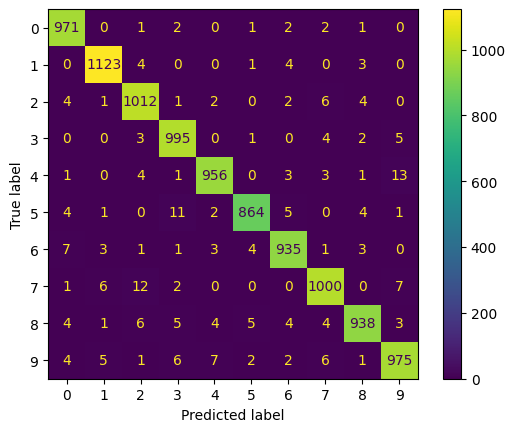

In [ ]:
# Create confusion matrix and display it
cm = confusion_matrix(y_test, test_preds, labels=np.arange(output_node_count))
disp = ConfusionMatrixDisplay(cm, display_labels=np.arange(output_node_count))
disp.plot()
plt.show()

Once again it can be seen that our model predicts correctly most of the time.
# 7 - PyTorch Comparison
Finally, my job with the handmade Neural Network is done. This means that I can just use some Python packages (which conveniently make the job a LOT easier for everybody) to create an identical model and compare their performances.

In [ ]:
import torch.nn.init as init

class Model_Torch(nn.Module) :
  def __init__(self) :
    super().__init__()
    self.model = nn.Sequential(
      nn.Flatten(),
      nn.Linear(input_node_count, hidden_node_count),
      nn.ReLU(),
      nn.Linear(hidden_node_count, output_node_count)
    )

    # Apply He initialization explicitly
    for m in self.modules():
        if isinstance(m, nn.Linear):
            init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
            if m.bias is not None:
                init.constant_(m.bias, 0)

  def forward(self, X) :
    return self.model(X)

After building our model, let's initialize other required components like the loss function.

In [ ]:
# Select the device the model will run on
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Determine batch size
batch_size = 64

# Initialize the model
model_torch = Model_Torch().to(device)

# Initialize Loss Function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model_torch.parameters(), lr=0.05)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float() / 255.0  # Normalize to [0, 1]
y_train_tensor = torch.from_numpy(y_train).long()

X_val_tensor = torch.from_numpy(X_val).float() / 255.0
y_val_tensor = torch.from_numpy(y_val).long()

X_test_tensor = torch.from_numpy(X_test).float() / 255.0
y_test_tensor = torch.from_numpy(y_test).long()

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nPyTorch DataLoaders created:")
print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")


PyTorch DataLoaders created:
Train batches: 782
Val batches: 157
Test batches: 157


The reason why I initialized Train DataLoader with shuffle on and others off is to prevent the model from learning order bias. Shuffling is not needed in validation or test sets as the model won't be learning from them anyway. They are there for evaluation within training and while predicting after the training.

In [ ]:
%%time
# Number of epochs the model will train for
num_epochs = 20

# Store training epoch and val losses
epoch_losses = []
val_losses = []

# For every epoch
for epoch in range(num_epochs) :
  # Put the model to training mode
  model_torch.train()

  # reset epoch loss
  epoch_loss = 0

  # For every batch
  for batch_idx, (x, y) in enumerate(train_loader) :
    # Move the tensors to the selected device
    x, y = x.to(device), y.to(device)

    # Run forward pass
    logits = model_torch.forward(x)

    # Calculate losses
    loss = loss_fn(logits, y)
    epoch_loss += loss.item() * x.size(0)

    # Reset gradients
    optimizer.zero_grad()

    # Perform Backpropagation
    loss.backward()

    # Update weights
    optimizer.step()

  # Calculate epoch loss by dividing total loss by the number of batches
  epoch_loss = epoch_loss / (len(train_loader.dataset))
  epoch_losses.append(epoch_loss)

  # VALIDATION
  # Reset validation loss
  val_loss = 0

  # No gradient calculation in validation
  with torch.no_grad(): # Added parentheses here
    # Put the model to evaluation mode
    model_torch.eval()

    for batch_idx, (x, y) in enumerate(val_loader) :
      # Move the tensors to the selected device
      x, y = x.to(device), y.to(device)

      # Run forward pass
      logits = model_torch.forward(x)

      # Calculate batch and total loss
      loss = loss_fn(logits, y)
      val_loss += loss.item()

    # Calculate val loss by dividing total loss by batch amount
    val_loss = val_loss / (len(val_loader))
    val_losses.append(val_loss)

    print(f"Epoch {epoch + 1} loss : {epoch_loss:.5f}, Val {epoch + 1} loss : {val_loss:.5f}")

Epoch 1 loss : 0.46050, Val 1 loss : 0.29104
Epoch 2 loss : 0.25484, Val 2 loss : 0.22740
Epoch 3 loss : 0.20521, Val 3 loss : 0.19973
Epoch 4 loss : 0.17279, Val 4 loss : 0.17101
Epoch 5 loss : 0.14926, Val 5 loss : 0.15417
Epoch 6 loss : 0.13168, Val 6 loss : 0.14098
Epoch 7 loss : 0.11760, Val 7 loss : 0.13043
Epoch 8 loss : 0.10620, Val 8 loss : 0.12042
Epoch 9 loss : 0.09632, Val 9 loss : 0.11569
Epoch 10 loss : 0.08814, Val 10 loss : 0.11364
Epoch 11 loss : 0.08117, Val 11 loss : 0.10201
Epoch 12 loss : 0.07486, Val 12 loss : 0.10002
Epoch 13 loss : 0.06946, Val 13 loss : 0.09826
Epoch 14 loss : 0.06465, Val 14 loss : 0.09327
Epoch 15 loss : 0.06035, Val 15 loss : 0.09086
Epoch 16 loss : 0.05665, Val 16 loss : 0.08999
Epoch 17 loss : 0.05277, Val 17 loss : 0.08602
Epoch 18 loss : 0.04972, Val 18 loss : 0.09067
Epoch 19 loss : 0.04676, Val 19 loss : 0.08221
Epoch 20 loss : 0.04399, Val 20 loss : 0.08200
CPU times: user 1min 8s, sys: 50.9 ms, total: 1min 8s
Wall time: 1min 9s


PyTorch model training is also done identically. Turns out the PyTorch model's training took one quarter of the time it took to train the Numpy based model. It is time to evaluate it on the validation dataset and on the test dataset.

In [ ]:
def evaluate_model(model, loader) :
  # Store a total loss
  total_loss = 0.0
  all_preds = []
  all_true_labels = []

  # Put model to evaluation mode
  model.eval()
  with torch.no_grad():
    # For every batch
    for x_batch, y_batch in loader:
      # move to selected device
      x_batch, y_batch = x_batch.to(device), y_batch.to(device)

      # Run forward pass
      logits = model(x_batch)

      # Get predictions
      predictions = torch.argmax(logits, dim=1)

      # Store predictions and true labels
      all_preds.extend(predictions.cpu().numpy())
      all_true_labels.extend(y_batch.cpu().numpy())

  # Calculate metrics
  metrics = {}
  metrics['Acc'] = accuracy_score(all_true_labels, all_preds)
  metrics['Pre'] = precision_score(all_true_labels, all_preds, average='weighted', zero_division=0)
  metrics['Rec'] = recall_score(all_true_labels, all_preds, average='weighted', zero_division=0)
  metrics['F1'] = f1_score(all_true_labels, all_preds, average='weighted', zero_division=0)

  print(f"Accuracy: {metrics['Acc']:.4f}")
  print(f"Precision: {metrics['Pre']:.4f}")
  print(f"Recall: {metrics['Rec']:.4f}")
  print(f"F1-score: {metrics['F1']:.4f}\n")

  return metrics

In [ ]:
# Print out metrics
print('Training')
train_metrics = evaluate_model(model_torch, train_loader)
print('Validation')
val_metrics = evaluate_model(model_torch, val_loader)
print('Test')
test_metrics = evaluate_model(model_torch, test_loader)

Training
Accuracy: 0.9910
Precision: 0.9911
Recall: 0.9910
F1-score: 0.9910

Validation
Accuracy: 0.9760
Precision: 0.9761
Recall: 0.9760
F1-score: 0.9760

Test
Accuracy: 0.9774
Precision: 0.9775
Recall: 0.9774
F1-score: 0.9774



Both models' performances on the test set are also identical. This makes me proud of the **Numpy** model but the effort it takes to build that compared to the **PyTorch** model is way too much.